<a href="https://colab.research.google.com/github/shellycute2529/CODSOFT/blob/main/Task1_Iris_flower_classification_(CodeAlpha).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
df.shape

(150, 6)

In [13]:
df.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


In [14]:
df['SepalLengthCm'].value_counts()

,count
SepalLengthCm,
5.0,10
6.3,9
5.1,9
6.7,8
5.7,8
6.4,7
5.5,7
5.8,7
4.9,6


In [15]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


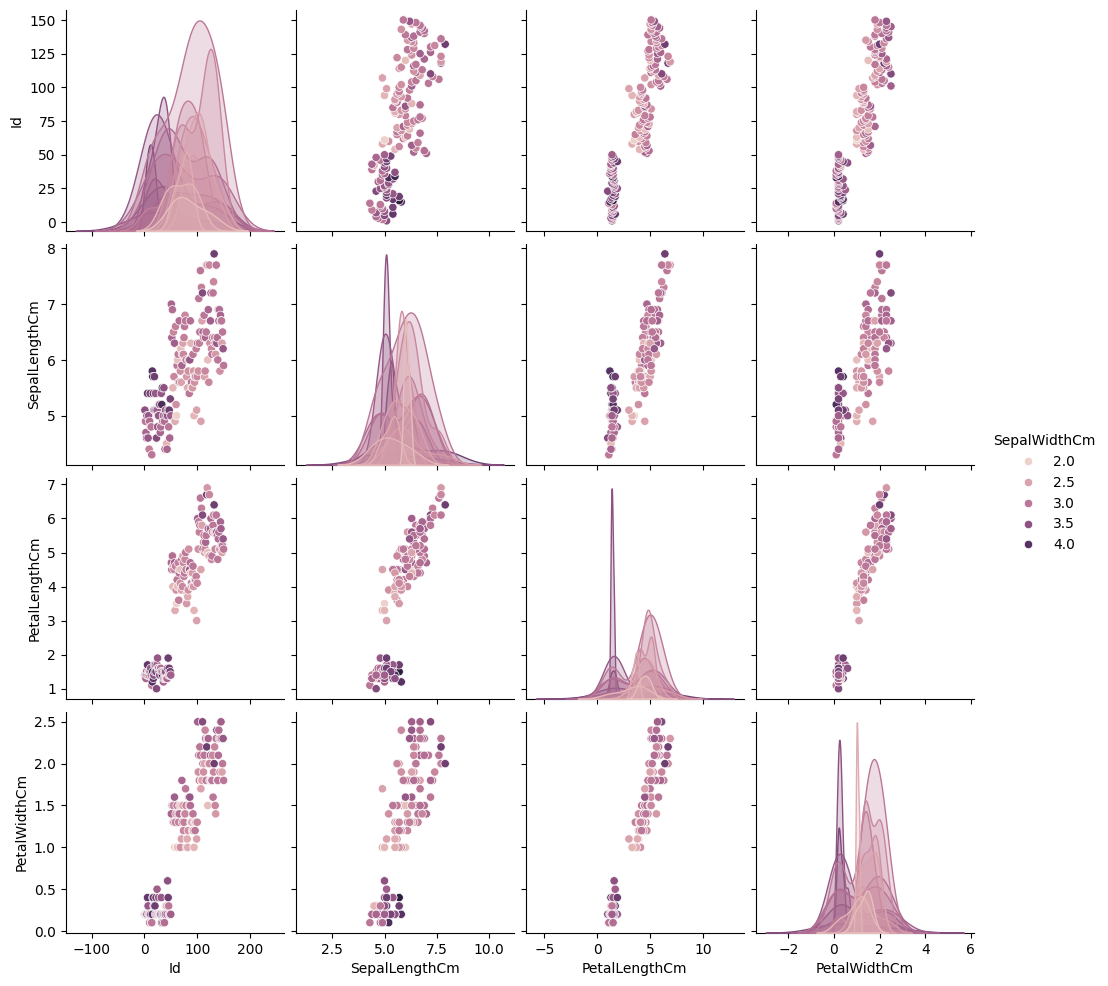

In [17]:
sns.pairplot(df,hue='SepalWidthCm')

Text(0.5, 1.0, 'SepalLengthCm vs SepalWidthCm')

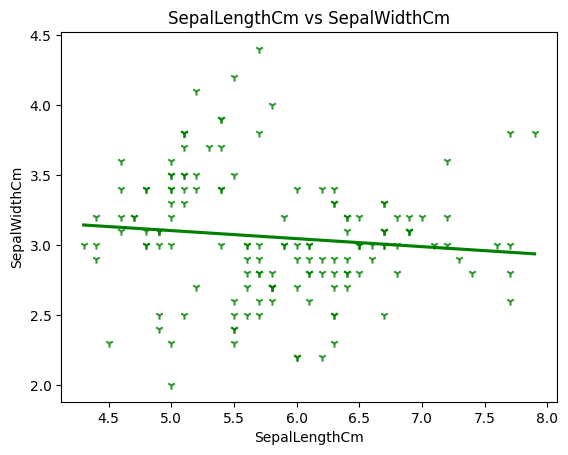

In [19]:
import matplotlib.pyplot as plt
sns.regplot(data=df,x=df['SepalLengthCm'],y=df['SepalWidthCm'],ci=None,marker='1',color='green')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('SepalLengthCm vs SepalWidthCm')

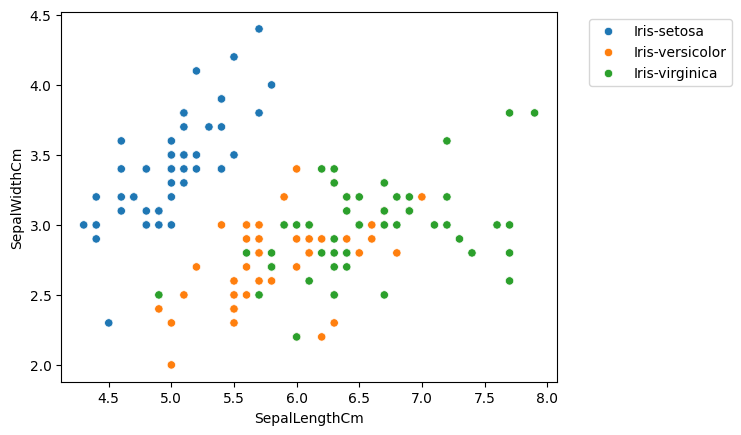

In [20]:
sns.scatterplot(data=df,x='SepalLengthCm',y='SepalWidthCm',hue='Species')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [21]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


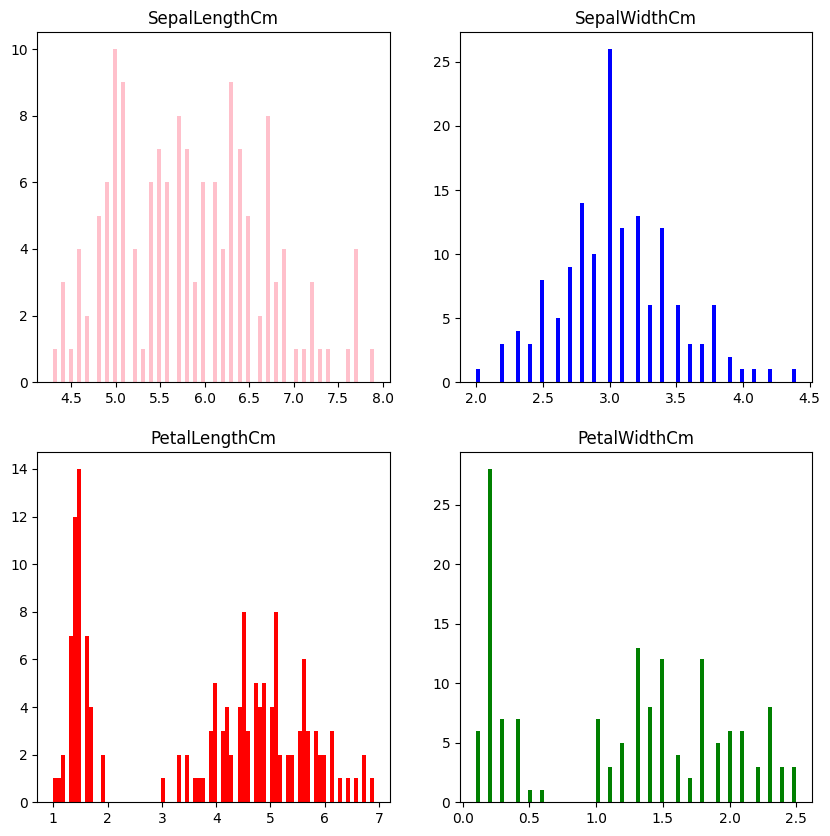

In [22]:
fig,ax=plt.subplots (2,2, figsize=(10,10))
ax[0,0].set_title("SepalLengthCm")
ax[0,0].hist(df['SepalLengthCm'], bins=80, color="pink")
ax[0,1].set_title("SepalWidthCm")
ax[0,1].hist(df['SepalWidthCm'], bins=80, color="blue")
ax[1,0].set_title("PetalLengthCm")
ax[1,0].hist(df['PetalLengthCm'], bins=80,color="red")
ax[1,1].set_title("PetalWidthCm")
ax[1,1].hist(df['PetalWidthCm'], bins=80, color="green")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

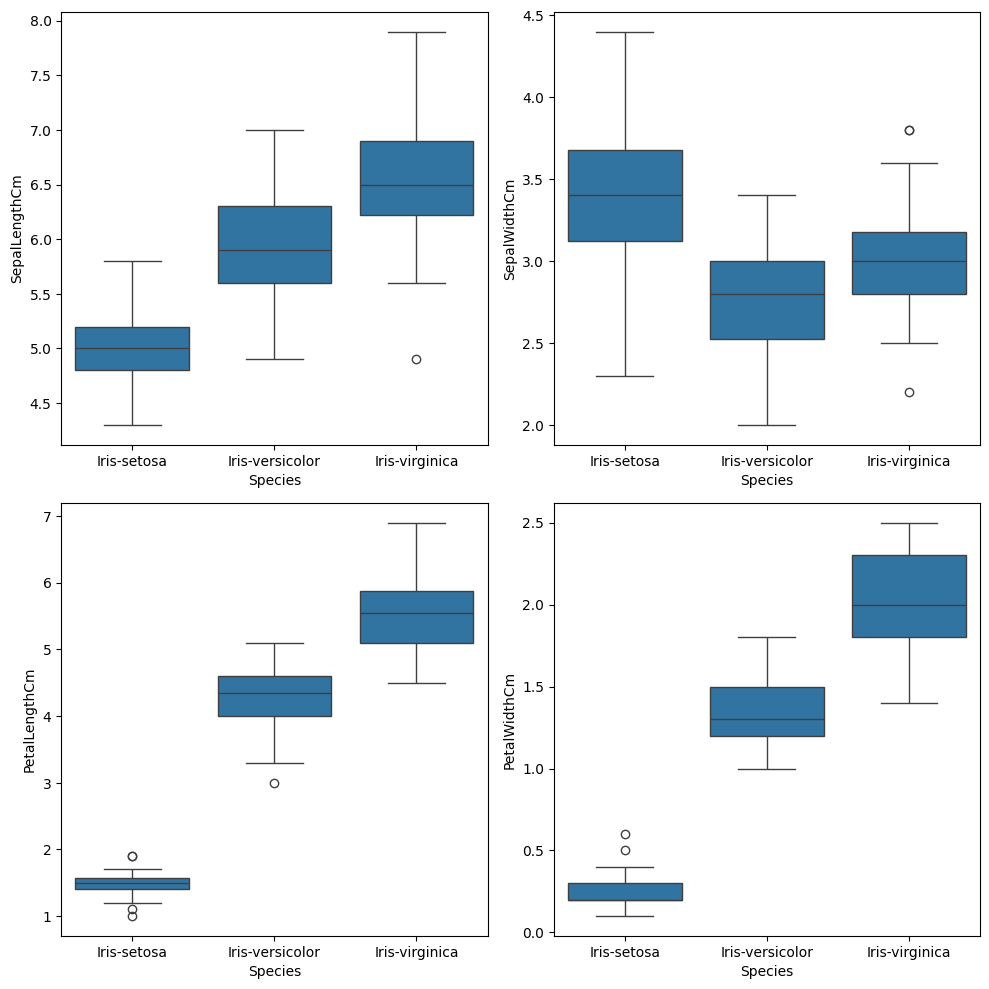

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

#Assuming df is already defined

def graph(y):
    sns.boxplot(x='Species', y=y, data=df)
plt.figure(figsize=(10,10))

plt.subplot(221)
graph("SepalLengthCm")

plt.subplot(222)
graph("SepalWidthCm")

plt.subplot(223)
graph("PetalLengthCm")

plt.subplot(224)
graph("PetalWidthCm")

plt.tight_layout()
plt.show

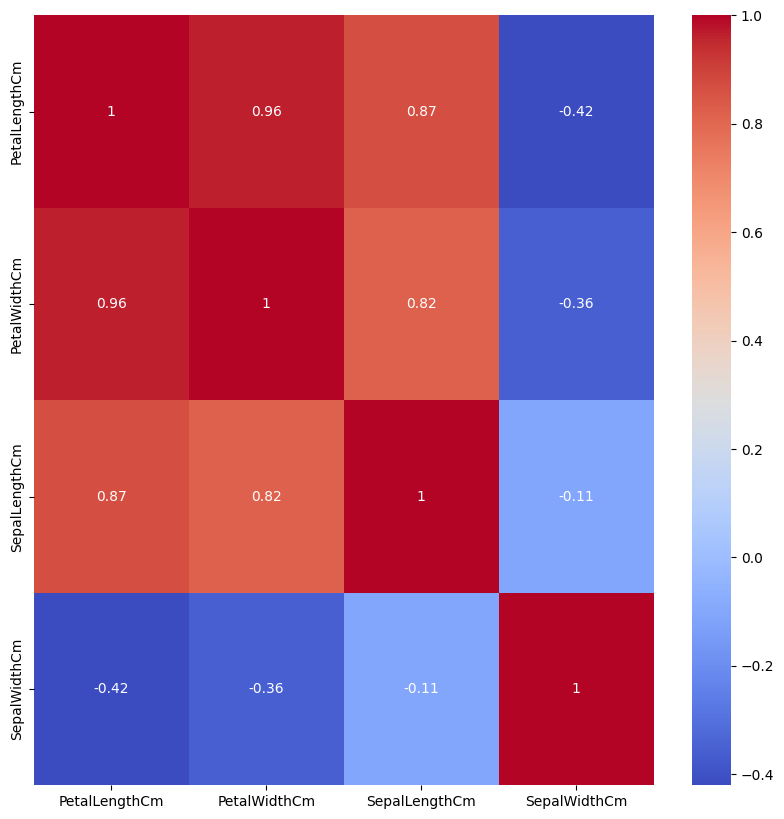

In [24]:
plt.figure(figsize=(10,10))
corr=df[['PetalLengthCm','PetalWidthCm','SepalLengthCm','SepalWidthCm']].corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

In [25]:
df['SepalLengthCm'].unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [26]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
data=df.values
X=data[:,0:4]
Y=df['Species']

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)
print(X_test)

[[121 6.9 3.2 5.7]
 [55 6.5 2.8 4.6]
 [75 6.4 2.9 4.3]
 [33 5.2 4.1 1.5]
 [142 6.9 3.1 5.1]
 [31 4.8 3.1 1.6]
 [147 6.3 2.5 5.0]
 [113 6.8 3.0 5.5]
 [135 6.1 2.6 5.6]
 [24 5.1 3.3 1.7]
 [123 7.7 2.8 6.7]
 [3 4.7 3.2 1.3]
 [27 5.0 3.4 1.6]
 [124 6.3 2.7 4.9]
 [73 6.3 2.5 4.9]
 [44 5.0 3.5 1.6]
 [82 5.5 2.4 3.7]
 [58 4.9 2.4 3.3]
 [84 6.0 2.7 5.1]
 [29 5.2 3.4 1.4]
 [120 6.0 2.2 5.0]
 [119 7.7 2.6 6.9]
 [12 4.8 3.4 1.6]
 [114 5.7 2.5 5.0]
 [85 5.4 3.0 4.5]
 [93 5.8 2.6 4.0]
 [74 6.1 2.8 4.7]
 [18 5.1 3.5 1.4]
 [11 5.4 3.7 1.5]
 [38 4.9 3.1 1.5]
 [26 5.0 3.0 1.6]
 [133 6.4 2.8 5.6]
 [2 4.9 3.0 1.4]
 [17 5.4 3.9 1.3]
 [62 5.9 3.0 4.2]
 [91 5.5 2.6 4.4]
 [86 6.0 3.4 4.5]
 [116 6.4 3.2 5.3]
 [81 5.5 2.4 3.8]
 [105 6.5 3.0 5.8]
 [59 6.6 2.9 4.6]
 [146 6.7 3.0 5.2]
 [115 5.8 2.8 5.1]
 [68 5.8 2.7 4.1]
 [19 5.7 3.8 1.7]]


In [29]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)

SVC()

In [30]:
predictions=model.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

1.0


In [31]:
wcss1 = []
for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state = 42)
  kmeans.fit(df[['PetalLengthCm','PetalWidthCm']])
  wcss1.append(kmeans.inertia_)

In [32]:
wcss1

[550.6434666666671,
 86.40394533570999,
 31.38775897435898,
 20.316007803485395,
 14.147293864755932,
 11.056639971910453,
 9.297130812538596,
 8.043872171477286,
 6.773348650891444,
 6.254273015873015]

In [33]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

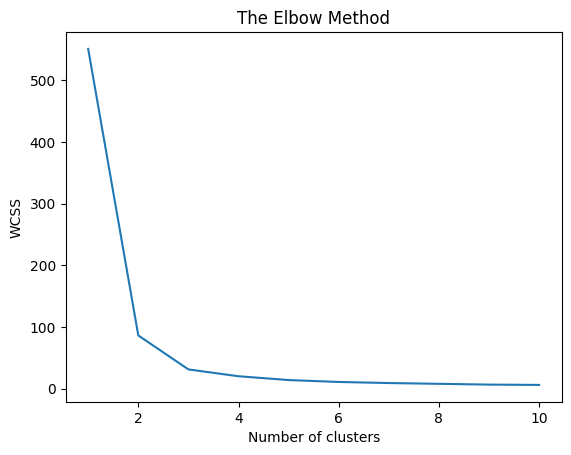

In [34]:
plt.plot(range(1,11),wcss1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
data_with_cluster1= df.copy()
data_with_cluster1['cluster']=kmeans.fit_predict(df[['PetalLengthCm','PetalWidthCm']])
data_with_cluster1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,8
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3
148,149,6.2,3.4,5.4,2.3,Iris-virginica,8
